# Proyecto final: módulo de deep learning

## Descarga de datos e imágenes

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"patriciamzta","key":"60c24791a1fd84cb37fb2f830dca0b34"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56            133        352  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           7651        142  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1423         32  1.0              
mayankanand2701/tesla-stock-price-dataset         

In [4]:
#! kaggle datasets download stevezhenghp/airbnb-price-prediction

! kaggle datasets download -d stevezhenghp/airbnb-price-prediction

Dataset URL: https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction
License(s): unknown
 99% 31.0M/31.3M [00:02<00:00, 21.2MB/s]
100% 31.3M/31.3M [00:02<00:00, 12.8MB/s]


In [5]:
! unzip airbnb-price-prediction

Archive:  airbnb-price-prediction.zip
  inflating: train.csv               


In [6]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io
import matplotlib.pyplot as plt

from tqdm import tqdm

from typing import Optional, Union

In [7]:
data = pd.read_csv("train.csv", sep = ',')

data.head(5).T

,0,1,2,3,4
id,6901257,6304928,7919400,13418779,3808709
log_price,5.010635,5.129899,4.976734,6.620073,4.744932
property_type,Apartment,Apartment,Apartment,House,Apartment
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
amenities,"{""Wireless Internet"",""Air conditioning"",Kitche...","{""Wireless Internet"",""Air conditioning"",Kitche...","{TV,""Cable TV"",""Wireless Internet"",""Air condit...","{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","{TV,Internet,""Wireless Internet"",""Air conditio..."
accommodates,3,7,5,4,2
bathrooms,1.0,1.0,1.0,1.0,1.0
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
cancellation_policy,strict,strict,moderate,flexible,moderate
cleaning_fee,True,True,True,True,True


In [8]:
# quita nulos
data = data.dropna(subset=['log_price'])

In [9]:
# Convertimos los logs de precios en precios
data["Price"] = np.exp(data["log_price"])

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Price'],
      dtype='object')

En esta propuesta emplearemos una perspectiva naíf, imaginando que no tenemos demasiado conocimiento acerca de qué variables resultan de mayor interés para la tarea y delegando ese trabajo en nuestros modelos.

In [10]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Posible carga de imágenes y datos desde GDrive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data = pd.read_csv("/content/drive/MyDrive/keepcoding_DL/data_KC.csv", sep=';')
images = np.load("/content/drive/MyDrive/keepcoding_DL/images_KC.npy")
data.shape, images.shape

((2135, 30), (2135, 224, 224, 3))

In [ ]:
!ls


airbnb-price-prediction.zip  drive  kaggle.json  sample_data  train.csv


In [15]:
muestra_i = 0
print(data.iloc[muestra_i])

id                                                                  6901257
log_price                                                          5.010635
property_type                                                     Apartment
room_type                                                   Entire home/apt
amenities                 {"Wireless Internet","Air conditioning",Kitche...
accommodates                                                              3
bathrooms                                                               1.0
bed_type                                                           Real Bed
cancellation_policy                                                  strict
cleaning_fee                                                           True
city                                                                    NYC
description               Beautiful, sunlit brownstone 1-bedroom in the ...
first_review                                                     2016-06-18
host_has_pro

In [18]:
# ESTO SÓLO ES NECESARIO POR PLOTEARLO CON OPENCV, DE CARA A LAS REDES PODEMOS METER LOS DATOS EN RGB
import numpy as np
R = images[muestra_i,:,:,0]
G = images[muestra_i,:,:,1]
B = images[muestra_i,:,:,2]
rgb_muestra = np.stack([B, G, R], axis=2)

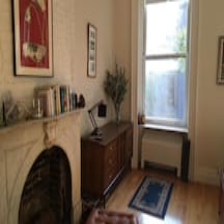

[[[0.68235296 0.5764706  0.40784314]
  [0.6745098  0.5686275  0.4       ]
  [0.6745098  0.54901963 0.3882353 ]
  ...
  [0.5647059  0.49019608 0.3647059 ]
  [0.5647059  0.49019608 0.3647059 ]
  [0.5647059  0.49019608 0.3647059 ]]

 [[0.68235296 0.5764706  0.40784314]
  [0.6745098  0.5686275  0.4       ]
  [0.6745098  0.5529412  0.39215687]
  ...
  [0.5647059  0.49019608 0.3647059 ]
  [0.5647059  0.49019608 0.3647059 ]
  [0.5647059  0.49019608 0.3647059 ]]

 [[0.68235296 0.5764706  0.40784314]
  [0.6745098  0.5686275  0.4       ]
  [0.6784314  0.5529412  0.39215687]
  ...
  [0.5647059  0.49019608 0.3647059 ]
  [0.5647059  0.49019608 0.3647059 ]
  [0.5647059  0.49019608 0.3647059 ]]

 ...

 [[0.44705883 0.36862746 0.2627451 ]
  [0.43529412 0.35686275 0.2509804 ]
  [0.4392157  0.36078432 0.25490198]
  ...
  [0.2901961  0.19607843 0.14509805]
  [0.30980393 0.19215687 0.15294118]
  [0.30980393 0.18431373 0.14901961]]

 [[0.44313726 0.3647059  0.25882354]
  [0.43529412 0.35686275 0.2509804 ]


In [19]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(rgb_muestra*255)
print(images[muestra_i])

Mostrar imágenes

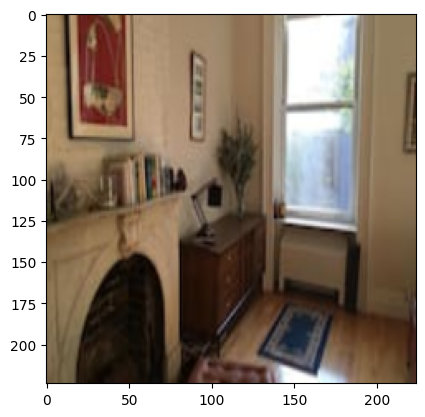

In [20]:
#primer imagen
plt.imshow(images[0])

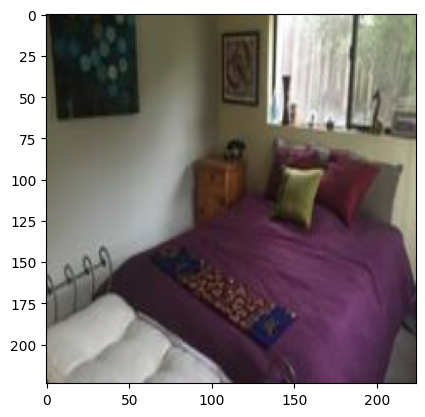

In [ ]:
# ultima imagen
plt.imshow(images[2134])

Convertir imágenes a formato para procesarlas

In [21]:
images_raw = images.astype("float32")
print(images_raw.shape)

images_scaled = images.astype("float32") / 255.
images_scaled.shape

(2135, 224, 224, 3)


(2135, 224, 224, 3)

Importar librerias a utilizar

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import optimizers, Model,callbacks
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalMaxPooling2D, Input, Concatenate
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.constraints import max_norm

# Preparación de datos.

Dividir el dataset y revisar la información para ver si se pueden eliminar algunas columnas

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2135.0,1.135862e+07,6.180578e+06,12068.000000,6.083100e+06,1.282450e+07,1.650152e+07,2.118810e+07
log_price,2135.0,4.762397e+00,6.929624e-01,2.890372,4.317488e+00,4.691348e+00,5.164786e+00,7.467371e+00
accommodates,2135.0,3.023888e+00,2.029282e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,2128.0,1.192434e+00,4.801897e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.500000e+00
latitude,2135.0,3.865578e+01,2.968179e+00,33.343574,3.419091e+01,4.067713e+01,4.074173e+01,4.238387e+01
longitude,2135.0,-9.127707e+01,2.175477e+01,-122.508663,-1.183438e+02,-7.400094e+01,-7.395093e+01,-7.099186e+01
number_of_reviews,2135.0,1.935269e+01,3.541436e+01,0.000000,1.000000e+00,5.000000e+00,2.200000e+01,3.180000e+02
review_scores_rating,1589.0,9.391567e+01,9.229399e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,2131.0,1.211168e+00,7.887038e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
beds,2132.0,1.638368e+00,1.152432e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2135 non-null   int64  
 1   log_price               2135 non-null   float64
 2   property_type           2135 non-null   object 
 3   room_type               2135 non-null   object 
 4   amenities               2135 non-null   object 
 5   accommodates            2135 non-null   int64  
 6   bathrooms               2128 non-null   float64
 7   bed_type                2135 non-null   object 
 8   cancellation_policy     2135 non-null   object 
 9   cleaning_fee            2135 non-null   bool   
 10  city                    2135 non-null   object 
 11  description             2135 non-null   object 
 12  first_review            1610 non-null   object 
 13  host_has_profile_pic    2125 non-null   object 
 14  host_identity_verified  2125 non-null   

Histogramas de columnas

Revisar como se comportan los datos númericos de forma gráfica


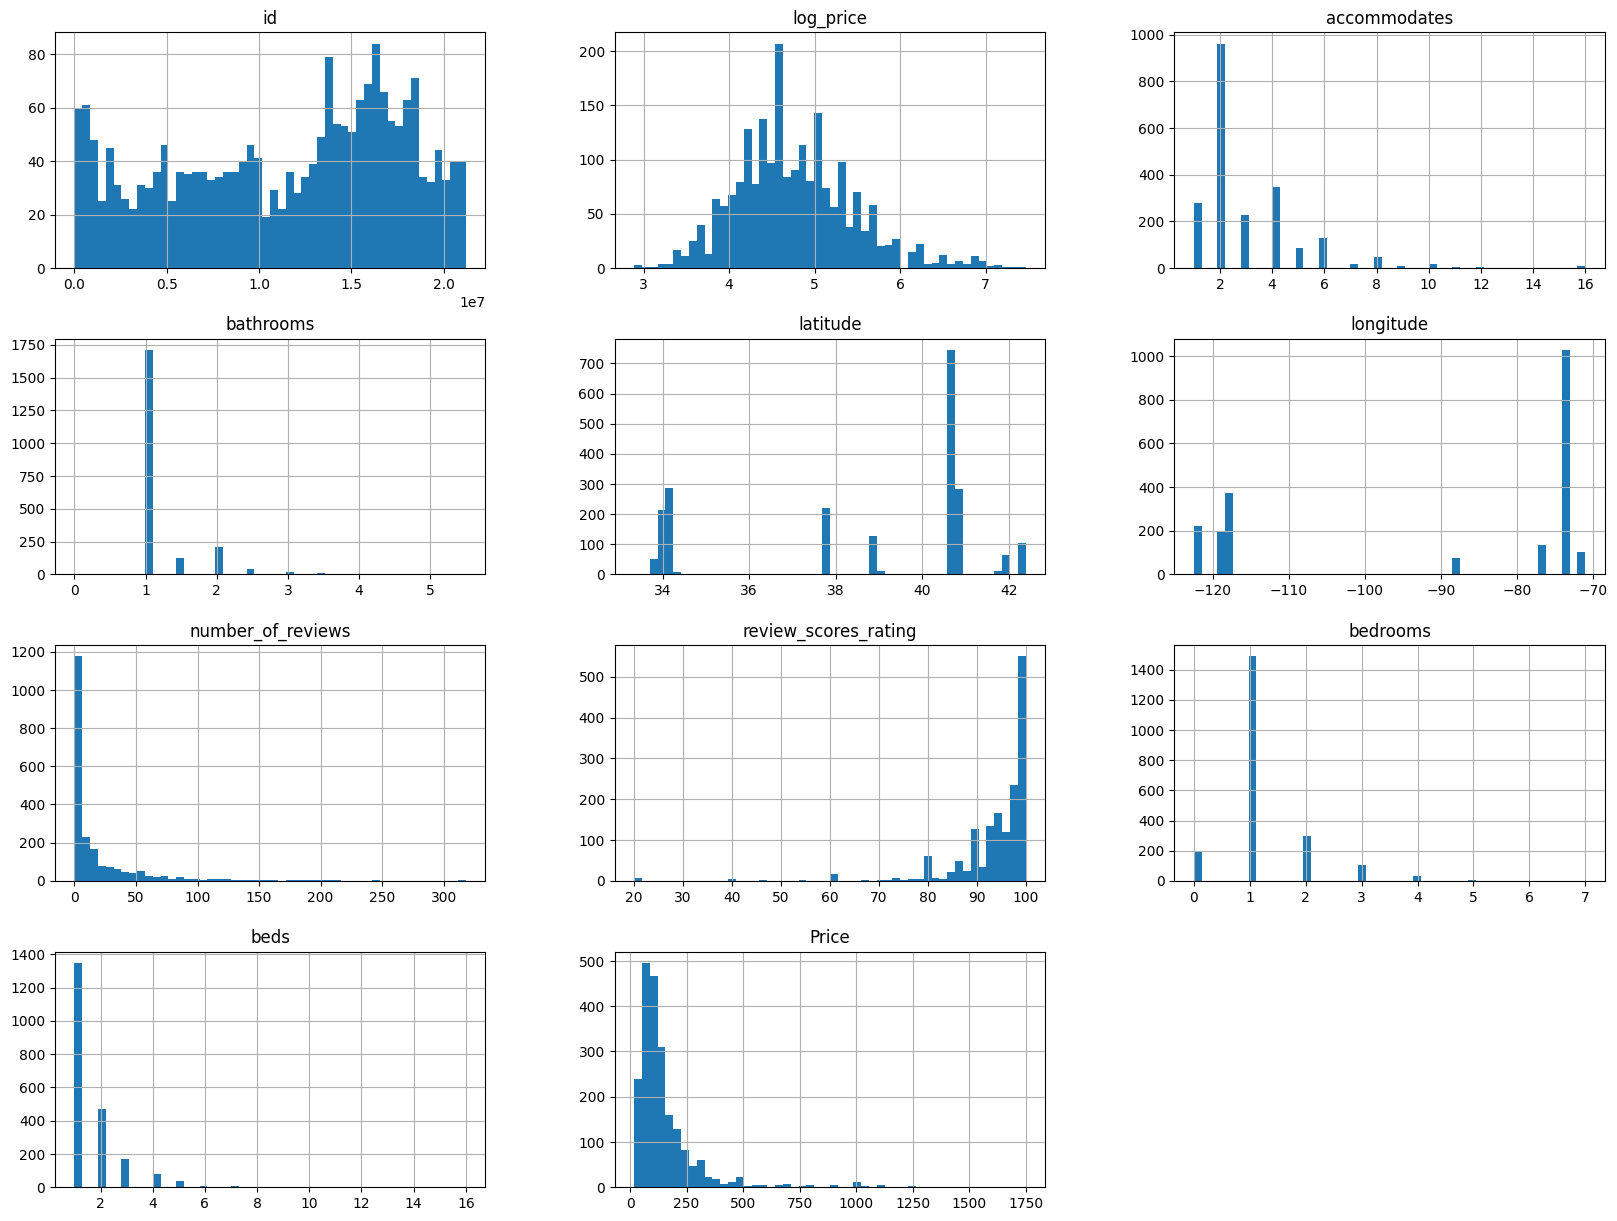

In [ ]:
#histogramas
data.hist(bins=50,figsize=(20,15))
plt.show()

Información de conteo de datos unicos.
Este paso lo hago sólo para revisar la información que hay si me puede servir o no.

In [ ]:
data['log_price'].value_counts(ascending=True)

log_price
5.365976     1
6.131226     1
5.720312     1
5.153292     1
5.963579     1
            ..
4.382027    58
4.317488    59
4.828314    60
5.010635    79
4.605170    84
Name: count, Length: 268, dtype: int64

In [ ]:
data['property_type'].value_counts(ascending=True)

property_type
Castle                   1
Serviced apartment       1
Timeshare                1
Hostel                   1
Villa                    1
In-law                   1
Boat                     2
Boutique hotel           2
Dorm                     3
Camper/RV                4
Guest suite              5
Guesthouse              10
Bungalow                10
Other                   14
Bed & Breakfast         24
Loft                    35
Townhouse               49
Condominium             67
House                  456
Apartment             1448
Name: count, dtype: int64

In [ ]:
data['room_type'].value_counts(ascending=True)

room_type
Shared room          64
Private room        951
Entire home/apt    1120
Name: count, dtype: int64

In [ ]:
data['amenities'].value_counts(ascending=True)

amenities
{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}                                                                                                                                                                                               1
{"Cable TV","Wireless Internet",Breakfast,"Indoor fireplace",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Shampoo}                                                                                                                                                                                                          1
{TV,Internet,"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector",Essentials,"Laptop friendly workspace"}                                                                                                                               

In [ ]:
data['accommodates'].value_counts(ascending=True)

accommodates
13      1
15      2
14      2
11      3
12      5
9       7
16      7
10     16
7      19
8      45
5      87
6     127
3     228
1     279
4     345
2     962
Name: count, dtype: int64

In [ ]:
data['bathrooms'].value_counts(ascending=True)

bathrooms
5.5       1
4.5       2
5.0       2
4.0       3
0.5       4
0.0       6
3.5       9
3.0      18
2.5      41
1.5     124
2.0     207
1.0    1711
Name: count, dtype: int64

In [ ]:
data['bed_type'].value_counts(ascending=True)

bed_type
Couch               6
Airbed             13
Pull-out Sofa      16
Futon              20
Real Bed         2080
Name: count, dtype: int64

In [ ]:
data['cancellation_policy'].value_counts(ascending=True)

cancellation_policy
super_strict_30      3
moderate           548
flexible           712
strict             872
Name: count, dtype: int64

In [ ]:
data['cleaning_fee'].value_counts(ascending=True)

cleaning_fee
False     607
True     1528
Name: count, dtype: int64

In [ ]:
data['city'].value_counts(ascending=True)

city
Chicago      75
Boston      104
DC          137
SF          221
LA          566
NYC        1032
Name: count, dtype: int64

In [ ]:
data['description'].value_counts(ascending=True)

description
Jackson Court is an intimate 10 unit, breakfast included, timeshare in upscale Pacific Heights.  Fine dining and shopping on Fillmore street, 2 blocks and Union street, 5 blocks. One of only two rooms with a king sized bed—on first floor.      Jackson Court is an intimate, cozy Bed & Breakfast ensconced in a three-story brownstone located in the heart of the upscale neighborhood of Pacific Heights. Situated on the corner of Jackson St and Buchanan St, each of the ten guest units is individually decorated with unique, antique furnishings and beautiful wallpaper.  Built in 1900, it survived both the 1906 and 1989 earthquakes virtually unscathed.       This romantic, elegant mansion is located two blocks from Fillmore St and five blocks from fashionable Union St, two hot spots that are famous for their fine dining and excellent shopping. Union Square, the cable car, Fisherman’s Wharf, and Ghirardelli Square are all reachable in under 15 minutes by car. There are also public tr

In [ ]:
data['first_review'].value_counts(ascending=True)

first_review
2013-08-02     1
2015-06-15     1
2013-01-30     1
2016-04-20     1
2012-10-10     1
              ..
2016-04-17     8
2017-01-01     9
2017-01-02     9
2016-09-05     9
2017-02-20    11
Name: count, Length: 878, dtype: int64

In [ ]:
data['host_has_profile_pic'].value_counts(ascending=True)

host_has_profile_pic
f       6
t    2119
Name: count, dtype: int64

In [ ]:
data['host_identity_verified'].value_counts(ascending=True)

host_identity_verified
f     747
t    1378
Name: count, dtype: int64

In [ ]:
data['host_response_rate'].value_counts(ascending=True)

host_response_rate
73%        1
77%        1
17%        1
68%        1
30%        1
76%        1
58%        1
53%        1
38%        1
62%        1
54%        2
87%        2
71%        2
29%        2
81%        2
91%        3
63%        3
20%        3
79%        3
40%        3
33%        4
60%        4
88%        4
86%        5
98%        5
82%        5
78%        5
99%        6
75%        6
83%        6
93%        8
96%        8
94%        8
89%        8
95%       10
97%       10
92%       14
70%       14
67%       15
50%       18
0%        22
80%       25
90%       67
100%    1176
Name: count, dtype: int64

In [ ]:
data['host_since'].value_counts(ascending=True)

host_since
2012-03-26    1
2015-05-08    1
2010-02-17    1
2013-09-26    1
2011-12-07    1
             ..
2014-05-15    6
2016-05-11    6
2015-03-31    6
2016-04-04    6
2014-01-07    6
Name: count, Length: 1355, dtype: int64

In [ ]:
data['last_review'].value_counts(ascending=True)

last_review
2015-07-01     1
2015-11-02     1
2015-10-05     1
2017-03-05     1
2016-11-01     1
              ..
2017-09-27    26
2017-09-04    31
2017-09-24    40
2017-04-30    41
2017-09-17    45
Name: count, Length: 476, dtype: int64

In [ ]:
data['latitude'].value_counts(ascending=True)

latitude
40.696524    1
40.725179    1
34.085091    1
40.724751    1
40.721442    1
            ..
40.854870    1
40.693766    1
38.913191    1
40.725869    1
37.765129    1
Name: count, Length: 2135, dtype: int64

In [ ]:
data['longitude'].value_counts(ascending=True)

longitude
-73.991617     1
-73.984394     1
-118.368633    1
-73.980090     1
-73.989145     1
              ..
-73.913911     1
-73.926291     1
-77.016395     1
-73.982436     1
-122.471598    1
Name: count, Length: 2135, dtype: int64

In [ ]:
data['name'].value_counts(ascending=True)

name
The Gramercy East                          1
Venice Beach Bungalow: Clean&Bright        1
Private Cabin with incredible view.        1
Modern 2-bedroom Loft in Greenpoint        1
ArtDeco Room                               1
                                          ..
Private room in heart of mission           1
AIDA SMALL PRIVATE ROOM/NO TV/NO AC        1
Quiet, Sunny Studio in Downtown NYC        1
CHARMING APARTMENT AT THE BEST LOCATION    2
home away from home                        2
Name: count, Length: 2133, dtype: int64

In [ ]:
data['neighbourhood'].value_counts(ascending=True)

neighbourhood
Grand Crossing         1
University Heights     1
Cerritos               1
Cahuenga Pass          1
Avondale               1
                      ..
Upper East Side       42
Upper West Side       48
Bushwick              66
Bedford-Stuyvesant    75
Williamsburg          87
Name: count, Length: 340, dtype: int64

In [ ]:
data['number_of_reviews'].value_counts(ascending=True)

number_of_reviews
125      1
142      1
158      1
157      1
119      1
      ... 
4       70
3      108
2      137
1      220
0      521
Name: count, Length: 160, dtype: int64

In [ ]:
data['review_scores_rating'].value_counts(ascending=True)

review_scores_rating
74.0       1
55.0       1
67.0       1
71.0       1
47.0       1
72.0       1
78.0       2
70.0       2
76.0       2
77.0       2
79.0       3
75.0       3
81.0       3
83.0       5
73.0       5
82.0       5
40.0       5
84.0       6
20.0       8
86.0      14
85.0      15
60.0      17
88.0      24
91.0      34
87.0      35
92.0      43
89.0      43
80.0      61
94.0      75
99.0      79
90.0      84
93.0      91
95.0      92
97.0     114
96.0     120
98.0     120
100.0    471
Name: count, dtype: int64

In [ ]:
data['thumbnail_url'].value_counts(ascending=True)

thumbnail_url
https://a0.muscache.com/im/pictures/86830824/4eae4602_original.jpg?aki_policy=small              1
https://a0.muscache.com/im/pictures/f3944734-37e6-44db-b1e5-49f9f2c5e8ae.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/cc41afaf-c844-42b7-be05-98a924fde11b.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/d8efd3d9-5d5d-40ad-8f03-c4b4064804ca.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/1473a6d1-7e29-4563-9580-4c7f3c46478c.jpg?aki_policy=small    1
                                                                                                ..
https://a0.muscache.com/im/pictures/cd905e56-b483-420b-8e75-85eee0484022.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/6e30e7a6-ebb6-4e80-8773-e5b8c437b635.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/992d13f4-696d-43ff-9dde-84dd16401405.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/92279683/e6b88826_original.jpg?aki_policy=small            

In [ ]:
data['zipcode'].value_counts(ascending=True)

zipcode
90248       1
90746       1
60644       1
11231       1
91331       1
           ..
90046      28
11237      28
11211.0    34
94110      38
11221      53
Name: count, Length: 417, dtype: int64

## Eliminar columnas

eliminar algunas columnas que pudieran no ser funcionales para el ejercicio. Claro que se tendrían que utlizar herramientas para poder experimentar con los datos de las columnas, pero por motivos de limitación en la GPU, utilizaré algunas columnas al azar e intentaré immplementar los modelos solicitados

In [23]:
#borrar columnas
#Seleccionar las columnas a borrar
erase_columns= ['description', 'first_review', 'host_has_profile_pic','host_response_rate', 'name','last_review','neighbourhood','review_scores_rating','thumbnail_url',]
#elimnar columnas
data = data.drop(erase_columns, axis=1)

Revisar el df después de eliminar las columnas, algunas columnas tienen nulos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2135 non-null   int64  
 1   log_price               2135 non-null   float64
 2   property_type           2135 non-null   object 
 3   room_type               2135 non-null   object 
 4   amenities               2135 non-null   object 
 5   accommodates            2135 non-null   int64  
 6   bathrooms               2128 non-null   float64
 7   bed_type                2135 non-null   object 
 8   cancellation_policy     2135 non-null   object 
 9   cleaning_fee            2135 non-null   bool   
 10  city                    2135 non-null   object 
 11  host_identity_verified  2125 non-null   object 
 12  host_since              2125 non-null   object 
 13  instant_bookable        2135 non-null   object 
 14  latitude                2135 non-null   

## Preparación de datos

In [24]:
# Decidir si lo resolvemos como clasificación o regresión: En este caso será clasificación.
regression=False

In [25]:
def change_label_class(data, rangos):
  # elegir rangos: barato/medio/caro
  y_class = []
  for y in data['Price']:
    if y <= rangos[0]:
      y_class.append(0) # Rango más barato
    elif rangos[0] < y <= rangos[1]:
      y_class.append(1) # Rango intermedio
    else:
      y_class.append(2)
  y_class = pd.Series(y_class)
  y_class.hist(bins=3)
  data["price_clases"] = y_class
  return data

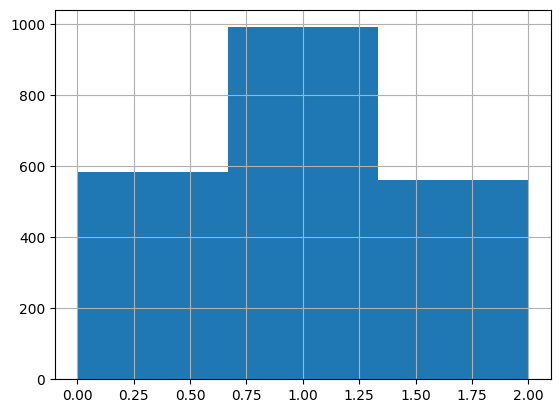

In [26]:
# Es clasificación, seleccionamos los rangos/umbrales de las clases:
# me guié con la información de los cuantiles

data = change_label_class(data, rangos = [75, 175])

El primero rango "barato" es menor a 75,
medio mayor a 75 pero menor a 175,
caro mayor a 75

Revisar la nueva columna, que aparece con el nombre price_classses

In [ ]:
data.head(5).T

,0,1,2,3,4
id,6901257,6304928,13418779,12422935,11825529
log_price,5.010635,5.129899,6.620073,4.442651,4.418841
property_type,Apartment,Apartment,House,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt
amenities,"{""Wireless Internet"",""Air conditioning"",Kitche...","{""Wireless Internet"",""Air conditioning"",Kitche...","{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","{TV,""Wireless Internet"",Heating,""Smoke detecto...","{TV,Internet,""Wireless Internet"",""Air conditio..."
accommodates,3,7,4,2,3
bathrooms,1.0,1.0,1.0,1.0,1.0
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
cancellation_policy,strict,strict,flexible,strict,moderate
cleaning_fee,True,True,True,True,True


## Crear Particiones
Seleccionar columnas para utilizar en todos los modelos


In [27]:
cols_name=["bedrooms", "bathrooms", "accommodates", "city"]

In [28]:
# Para el dataset tabular

from sklearn.model_selection import train_test_split

# División de los datos
def create_partition(data, regression, cols_name=["bedrooms", "bathrooms", "accommodates", "city"]):
  x_complete = data[cols_name]
  # Seleccionamos las columnas de los atributos:
  y_complete = data['price_clases']


  x_train, x_test, y_train, y_test = train_test_split(x_complete, y_complete, test_size=0.25,
                                                      random_state=42,
                                                      shuffle=True,
                                                      stratify=y_complete)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.15,
                                                      random_state=42,
                                                      shuffle=True,
                                                      stratify=y_train)

  return x_train, x_test, y_train, y_test, x_val,y_val



revisar la forma de los data set train, val y test

In [29]:
x_train, x_test, y_train, y_test, x_val,y_val = create_partition(data, regression, cols_name=cols_name)
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1360, 4) (241, 4) (534, 4)
(1360,) (241,) (534,)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 1138 to 1333
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      1357 non-null   float64
 1   bathrooms     1354 non-null   float64
 2   accommodates  1360 non-null   int64  
 3   city          1360 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


Índices de los set de train, test, y validation

In [30]:
idx_train = y_train.index.values
idx_val = y_val.index.values
idx_test = y_test.index.values

## Convertir etiquetas a clasificación


In [31]:
# convertir  las etiquetas a one-hot
# Convertir a dataframe por coherencia con clasificación:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
# Convertir a df:
y_train = pd.DataFrame(y_train, columns=["bajo","medio", "alto"])
y_train.index = idx_train
y_val = pd.DataFrame(y_val, columns=["bajo","medio", "alto"])
y_val.index = idx_val
y_test = pd.DataFrame(y_test, columns=["bajo","medio", "alto"])
y_test.index = idx_test

In [ ]:
y_val.head()

,bajo,medio,alto
1286,0.0,1.0,0.0
61,0.0,0.0,1.0
2044,0.0,1.0,0.0
1034,0.0,0.0,1.0
580,0.0,1.0,0.0


In [32]:
# Guardar las particiones en .csv para usarlas luego:
# Para training
x_train.to_csv("sample_data/x_train.csv", sep=";", header=True)
y_train.to_csv("sample_data/y_train.csv", sep=";", header=True)

# Para validation
x_val.to_csv("sample_data/x_val.csv", sep=";", header=True)
y_val.to_csv("sample_data/y_val.csv", sep=";", header=True)

# Para test
x_test.to_csv("sample_data/x_test.csv", sep=";", header=True)
y_test.to_csv("sample_data/y_test.csv", sep=";", header=True)


In [ ]:
y_train.head()

,bajo,medio,alto
1138,0.0,0.0,1.0
2080,0.0,0.0,1.0
1339,0.0,1.0,0.0
1704,0.0,0.0,1.0
1214,0.0,1.0,0.0


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 1138 to 1333
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      1357 non-null   float64
 1   bathrooms     1354 non-null   float64
 2   accommodates  1360 non-null   int64  
 3   city          1360 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


## Preprocesamiento de datos tabulares


In [33]:
#Imputar nulos función
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

#Imputar nulos en los dataset
x_train[x_train.select_dtypes(include=['float64', 'int64']).columns] = imputer.fit_transform(x_train.select_dtypes(include=['float64', 'int64']))
x_val[x_val.select_dtypes(include=['float64', 'int64']).columns] = imputer.transform(x_val.select_dtypes(include=['float64', 'int64']))
x_test[x_test.select_dtypes(include=['float64', 'int64']).columns] = imputer.transform(x_test.select_dtypes(include=['float64', 'int64']))

Revisión de información

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 1138 to 1333
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      1360 non-null   float64
 1   bathrooms     1360 non-null   float64
 2   accommodates  1360 non-null   float64
 3   city          1360 non-null   object 
dtypes: float64(3), object(1)
memory usage: 53.1+ KB


In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 1286 to 997
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      241 non-null    float64
 1   bathrooms     241 non-null    float64
 2   accommodates  241 non-null    float64
 3   city          241 non-null    object 
dtypes: float64(3), object(1)
memory usage: 9.4+ KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 772 to 2075
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      534 non-null    float64
 1   bathrooms     534 non-null    float64
 2   accommodates  534 non-null    float64
 3   city          534 non-null    object 
dtypes: float64(3), object(1)
memory usage: 20.9+ KB


#Datos categóricos

Códificación one-hot de la columna City, para poder indicar en cada columna de la ciudad si se encuentra ahí o no eñ airbnb

In [34]:
categorical_df = pd.DataFrame([], columns=[])

col_categorical_atribs = ["city"]

for col in col_categorical_atribs:
  new_cols_oneHot = pd.get_dummies(data[col], prefix=col)*1.0 # multiplico por 1.0 para convertir True/False a números directamente
  print(new_cols_oneHot.head())
  categorical_df = pd.concat([categorical_df, new_cols_oneHot], axis=1)

print(categorical_df.head())

   city_Boston  city_Chicago  city_DC  city_LA  city_NYC  city_SF
0          0.0           0.0      0.0      0.0       1.0      0.0
1          0.0           0.0      0.0      0.0       1.0      0.0
2          0.0           0.0      0.0      0.0       0.0      1.0
3          0.0           0.0      0.0      0.0       0.0      1.0
4          0.0           0.0      0.0      1.0       0.0      0.0
   city_Boston  city_Chicago  city_DC  city_LA  city_NYC  city_SF
0          0.0           0.0      0.0      0.0       1.0      0.0
1          0.0           0.0      0.0      0.0       1.0      0.0
2          0.0           0.0      0.0      0.0       0.0      1.0
3          0.0           0.0      0.0      0.0       0.0      1.0
4          0.0           0.0      0.0      1.0       0.0      0.0


revisión de datos

In [ ]:
categorical_df.columns

Index(['city_Boston', 'city_Chicago', 'city_DC', 'city_LA', 'city_NYC',
       'city_SF'],
      dtype='object')

In [35]:
categorical_df.iloc[idx_train]

,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
1138,0.0,0.0,0.0,0.0,1.0,0.0
2080,0.0,0.0,0.0,1.0,0.0,0.0
1339,0.0,0.0,0.0,1.0,0.0,0.0
1704,0.0,0.0,0.0,1.0,0.0,0.0
1214,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
385,0.0,0.0,0.0,1.0,0.0,0.0
279,0.0,0.0,0.0,1.0,0.0,0.0
1421,0.0,0.0,0.0,0.0,1.0,0.0
366,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Añadimos las nuevas columnas y borramos las antiguas
x_train = x_train.join(categorical_df.iloc[idx_train])
# eliminar categorical cols:
x_train = x_train.drop(col_categorical_atribs, axis=1)

x_val = x_val.join(categorical_df.iloc[idx_val])
# eliminar categorical cols:
x_val = x_val.drop(col_categorical_atribs, axis=1)

x_test = x_test.join(categorical_df.iloc[idx_test])
# eliminar categorical cols:
x_test = x_test.drop(col_categorical_atribs, axis=1)

Primeras columnas del dataset de x_test

In [ ]:
x_train.head()

,bedrooms,bathrooms,accommodates,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
1138,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
2080,2.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
1339,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1704,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
1214,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_train.shape

(1360, 9)

# Creación red 1D

Creación del modelo de red neuronal.

Código para definir una red neuronal perceptrón multicapa

In [37]:
def create_1D_MLP(regression, input_shape, n_classes = 3):
  model = Sequential()
  #primer capa dense
  model.add(Dense(124, input_shape=(input_shape_1d,), activation="relu"))
  # 2da capa dense
  model.add(Dense(32, activation="relu"))
  # 3ra capa dense
  model.add(Dense(n_classes, activation="softmax"))
  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               1240      
                                                                 
 dense_1 (Dense)             (None, 32)                4000      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5339 (20.86 KB)
Trainable params: 5339 (20.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


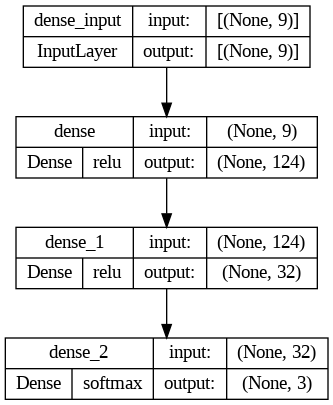

In [38]:
#llamar la función y muestra gráfica de como se visualiza la arquitectura
input_shape_1d= x_train.shape[-1]
model = create_1D_MLP(False, input_shape=input_shape_1d, n_classes=3)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

Compilar modelo

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Entrenamiento de modelo,

In [40]:
n_epochs=30
batch_size = 512
history = model.fit(x_train, y_train,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Epoch 1/30
3/3 [==============================] - 3s 113ms/step - loss: 1.3646 - accuracy: 0.2566 - val_loss: 1.2177 - val_accuracy: 0.2531
Epoch 2/30
3/3 [==============================] - 0s 15ms/step - loss: 1.1841 - accuracy: 0.2522 - val_loss: 1.1002 - val_accuracy: 0.3402
Epoch 3/30
3/3 [==============================] - 0s 15ms/step - loss: 1.0894 - accuracy: 0.3640 - val_loss: 1.0532 - val_accuracy: 0.4066
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 1.0542 - accuracy: 0.4309 - val_loss: 1.0396 - val_accuracy: 0.4938
Epoch 5/30
3/3 [==============================] - 0s 16ms/step - loss: 1.0403 - accuracy: 0.4713 - val_loss: 1.0321 - val_accuracy: 0.5021
Epoch 6/30
3/3 [==============================] - 0s 16ms/step - loss: 1.0301 - accuracy: 0.4926 - val_loss: 1.0204 - val_accuracy: 0.5062
Epoch 7/30
3/3 [==============================] - 0s 16ms/step - loss: 1.0175 - accuracy: 0.4978 - val_loss: 1.0051 - val_accuracy: 0.5145
Epoch 8/30
3/3 [==========

valor de loss muy alto lo que significa que no tiene buen nivel de ajuste al estar próximo a 1

Accuraccy indica que el está acertando poco más de la mitad de las veces, este valor indica la proporción correctas del set de train

val_loss por lo general suele estar por encima de loss

val_accuracy es donde se muestra que tan razonable es el modelo

en resumen el valor no está teniendo un buen rendimiento al estar por la mitad el accuracy

Gráfica de pérdida

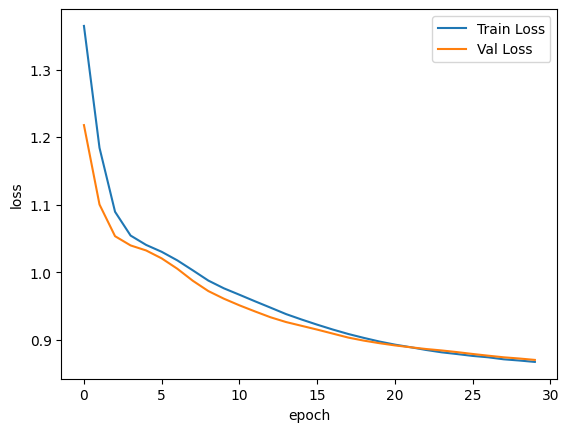

In [41]:
import matplotlib.pyplot as plt
# Graficar la pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Ambas curvas (Train Loss y Val Loss) están descendiendo juntas. Esto sugiere que el modelo está aprendiendo y ajustando sus parámetros para reducir la pérdida. Al estar juntas significa que se están generalizando bien, no se ve un overfiting

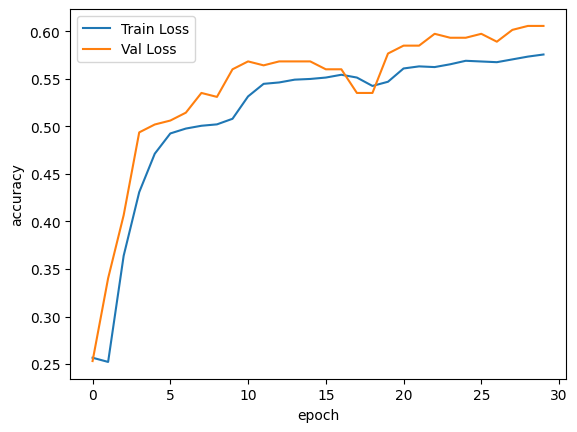

In [42]:
# Graficar accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Train Loss')
    plt.plot(history.history['val_accuracy'], label='Val Loss')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

Crear MLP

Predicciones

In [43]:
input_shape=input_shape_1d
lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True)


model1D = create_1D_MLP(regression, input_shape, n_classes = 3)
model1D.compile(loss="categorical_crossentropy", optimizer=SGD(lr), metrics=["accuracy"])
H = model1D.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=batch_size)

predictions1D_train = model1D.predict(x_train, batch_size=batch_size)
predictions1D_val = model1D.predict(x_val, batch_size=batch_size)
predictions1D_test = model1D.predict(x_test, batch_size=batch_size)
print(classification_report(y_test.values.argmax(axis=1), predictions1D_test.argmax(axis=1)))


Epoch 1/30
3/3 [==============================] - 1s 105ms/step - loss: 1.0666 - accuracy: 0.2926 - val_loss: 1.0570 - val_accuracy: 0.3154
Epoch 2/30
3/3 [==============================] - 0s 16ms/step - loss: 1.0550 - accuracy: 0.3125 - val_loss: 1.0498 - val_accuracy: 0.3527
Epoch 3/30
3/3 [==============================] - 0s 15ms/step - loss: 1.0470 - accuracy: 0.3824 - val_loss: 1.0443 - val_accuracy: 0.3527
Epoch 4/30
3/3 [==============================] - 0s 17ms/step - loss: 1.0401 - accuracy: 0.4338 - val_loss: 1.0399 - val_accuracy: 0.4564
Epoch 5/30
3/3 [==============================] - 0s 15ms/step - loss: 1.0350 - accuracy: 0.4779 - val_loss: 1.0360 - val_accuracy: 0.5021
Epoch 6/30
3/3 [==============================] - 0s 18ms/step - loss: 1.0307 - accuracy: 0.4956 - val_loss: 1.0326 - val_accuracy: 0.5062
Epoch 7/30
3/3 [==============================] - 0s 16ms/step - loss: 1.0270 - accuracy: 0.5110 - val_loss: 1.0292 - val_accuracy: 0.4979
Epoch 8/30
3/3 [==========

Gráfica de pérdida



[]

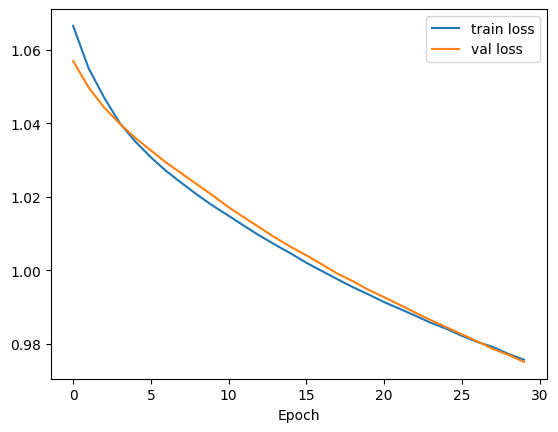

In [44]:
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

Imagénes

Dividir el conjunto de imagenes en train/test/validation

In [45]:
train_x_imgs = images[idx_train, :,:,:]
val_x_imgs = images[idx_val, :,:,:]
test_x_imgs = images[idx_test, :,:,:]
# Imágenes: verificar la forma del conjunto de imagenes
(train_x_imgs.shape, val_x_imgs.shape, test_x_imgs.shape)

((1360, 224, 224, 3), (241, 224, 224, 3), (534, 224, 224, 3))

In [46]:
# Verificar la forma de datos tabulares:
(x_train.shape, x_val.shape, x_test.shape)

((1360, 9), (241, 9), (534, 9))

## Creación de red 2D

In [47]:
#Entrenamiento
def create_2D_CNN(regresion, input_shape, filters=(16, 32, 64), n_classes = 3, chanDim=3):

  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape_2d)


  for layer in base_model.layers:
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada.')

# última capa del model y añadir clasificador (top_model)
  last = base_model.layers[-1].output
  x = GlobalMaxPooling2D()(last)
  x = Dense(1024, activation='relu',kernel_constraint=max_norm(3.))(x)
  x = Dense(n_classes, activation='softmax', name='predictions')(x)
  model = Model(base_model.input, x)

  # vemos la estructura del modelo
  model.summary()
  return model

58889256/58889256 [==============================] - 4s 0us/step
Capa input_1 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Capa block5_conv1 congelada.
Capa block5_conv2 congelada.
Capa block5_conv3 congelada.
Capa block5_pool congelada.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                 

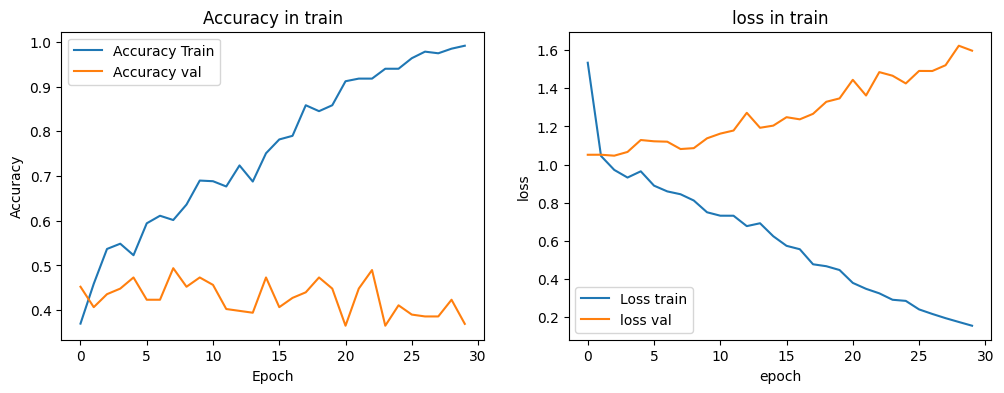

In [48]:
input_shape_2d = (224, 224, 3)
n_classes = 3
n_epochs=30

# Crear el modelo CNN
model = create_2D_CNN(regresion=False, input_shape=input_shape_2d, n_classes=n_classes)

# Compilar el modelo
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr_schedule), metrics=['accuracy'])

# Asegúra que etiquetas estén en formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=n_classes)
y_val_one_hot = to_categorical(y_val, num_classes=n_classes)
y_test_one_hot = to_categorical(y_test, num_classes=n_classes)

# Entrenar el modelo
history = model.fit(train_x_imgs, y_train,
                    batch_size=42,
                    epochs=n_epochs,
                    validation_data=(val_x_imgs, y_val))

# Evaluar el modelo en el conjunto de prueba
scores = model.evaluate(test_x_imgs, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

# Genera predicciones en el conjunto de prueba
predictions = model.predict(test_x_imgs)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Asegura que true_classes y predicted_classes tienen el mismo tamaño
print(f"predicted_classes size: {predicted_classes.shape}")
print(f"true_classes size: {true_classes.shape}")

# Informe de clasificación
print(classification_report(true_classes, predicted_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

# Grafica entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Train')
plt.plot(history.history['val_accuracy'], label='Accuracy val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy in train')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss train')
plt.plot(history.history['val_loss'], label='loss val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('loss in train')

plt.show()


Accuracy in train

accuracy train: Esto indica que el modelo está aprendiendo aunque no se ve una línea curva, mientras que accuracy val es muy baja y no mejora, el modelo no está generalizando los datos, se sugiere overfiting.

Loss in train.
loss_val se mantiene algo constante aunque tiene algunas fluctuaciones,





# Late Fusion

17/17 [==============================] - 2s 120ms/step
Epoch 1/20
14/14 [==============================] - 2s 25ms/step - loss: 0.7498 - accuracy: 0.7022 - val_loss: 1.2400 - val_accuracy: 0.4564
Epoch 2/20
14/14 [==============================] - 0s 7ms/step - loss: 0.2336 - accuracy: 0.9684 - val_loss: 1.7220 - val_accuracy: 0.4357
Epoch 3/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0758 - accuracy: 0.9919 - val_loss: 2.2456 - val_accuracy: 0.4108
Epoch 4/20
14/14 [==============================] - 0s 11ms/step - loss: 0.0354 - accuracy: 0.9956 - val_loss: 2.6235 - val_accuracy: 0.4066
Epoch 5/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.9978 - val_loss: 2.8107 - val_accuracy: 0.3859
Epoch 6/20
14/14 [==============================] - 0s 10ms/step - loss: 0.0146 - accuracy: 0.9978 - val_loss: 2.9708 - val_accuracy: 0.3983
Epoch 7/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0109 - accuracy: 0.9985 - v

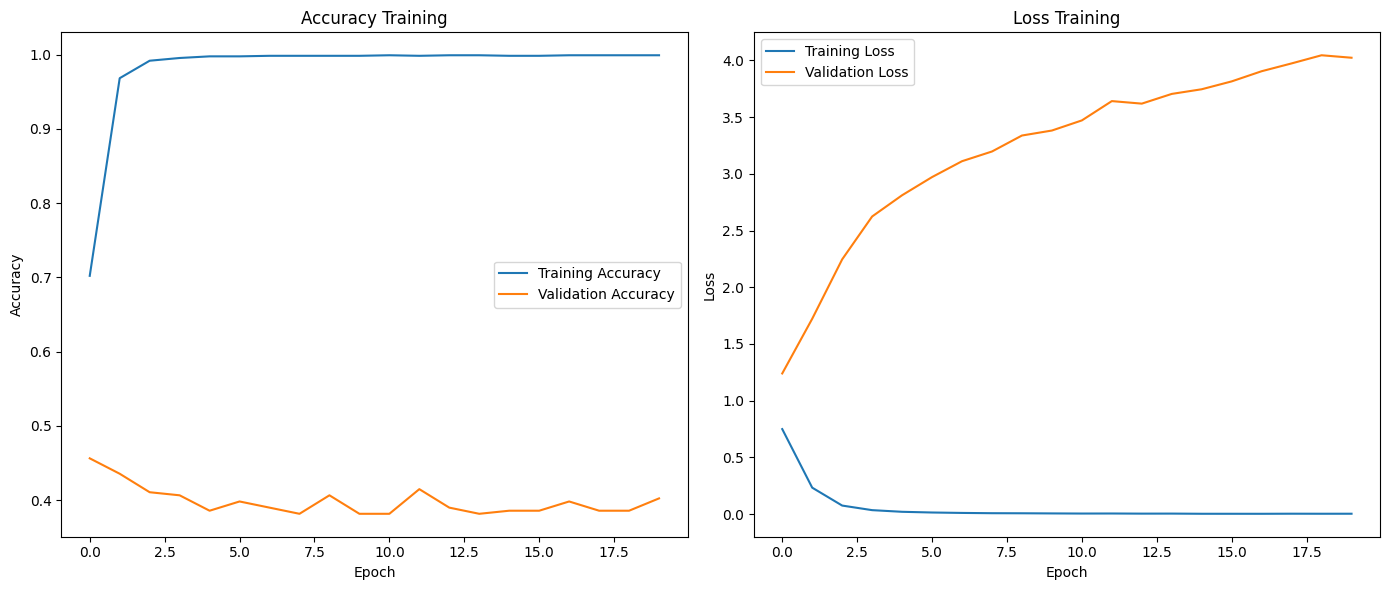

In [49]:
# Función para extraer características del modelo
def extract_model(model, X):
  intermediate_model = Model(inputs=model.input, outputs=model.layers[-2].output)
  features = intermediate_model.predict(X)
  return features

# Extraer características de los conjuntos de datos
train_1d = model1D.predict(x_train)
val_1d = model1D.predict(x_val)
test_1d = model1D.predict(x_test)

train_2d = extract_model(model, train_x_imgs)
val_2d = extract_model(model, val_x_imgs)
test_2d = extract_model(model, test_x_imgs)

# Concatenar características
train_concat = np.concatenate([train_1d, train_2d], axis=1)
val_concat = np.concatenate([val_1d, val_2d], axis=1)
test_concat  = np.concatenate([test_1d, test_2d], axis=1)

# Definir la arquitectura del modelo de fusión
def create_fusion_model(input_shape, n_classes):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=input_shape))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(n_classes, activation='softmax'))
  return model

# Crear y compilar el modelo de fusión
shape_fusion = (train_concat.shape[1],)  # Convertir a tupla
fusion_model = create_fusion_model(shape_fusion, n_classes)
fusion_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Entrenar el modelo de fusión
fusion_history = fusion_model.fit(train_concat, y_train,
                                   epochs=20,
                                   batch_size=100,
                                   validation_data=(val_concat, y_val))

# Evaluar el modelo de fusión en el conjunto de prueba
scores = fusion_model.evaluate(test_concat, y_test)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

# Hacer predicciones en el conjunto de prueba
predictions = fusion_model.predict(test_concat)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Imprimir reporte de clasificación y matriz de confusión
print(classification_report(true_classes, predicted_classes))
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

# Crear una figura para las gráficas
plt.figure(figsize=(14, 6))

# Subtrama 1: Exactitud
plt.subplot(1, 2, 1)  # Primer gráfico en una figura de 1 fila y 2 columnas
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Training')

# Subtrama 2: Pérdida
plt.subplot(1, 2, 2)  # Segundo gráfico en una figura de 1 fila y 2 columnas
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Training')

# Mostrar las gráficas
plt.tight_layout()
plt.show()


Se agrega dropout

decidí agregar deroput para ver si mejoraban los resultados

17/17 [==============================] - 2s 114ms/step
Epoch 1/20
43/43 [==============================] - 2s 8ms/step - loss: 0.9663 - accuracy: 0.5279 - val_loss: 1.0823 - val_accuracy: 0.4606
Epoch 2/20
43/43 [==============================] - 0s 4ms/step - loss: 0.5497 - accuracy: 0.8007 - val_loss: 1.4468 - val_accuracy: 0.4481
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.9213 - val_loss: 1.8812 - val_accuracy: 0.4357
Epoch 4/20
43/43 [==============================] - 0s 4ms/step - loss: 0.1581 - accuracy: 0.9537 - val_loss: 2.3079 - val_accuracy: 0.3942
Epoch 5/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0832 - accuracy: 0.9801 - val_loss: 2.6653 - val_accuracy: 0.4274
Epoch 6/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0696 - accuracy: 0.9831 - val_loss: 2.9890 - val_accuracy: 0.3568
Epoch 7/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0608 - accuracy: 0.9809 - val_l

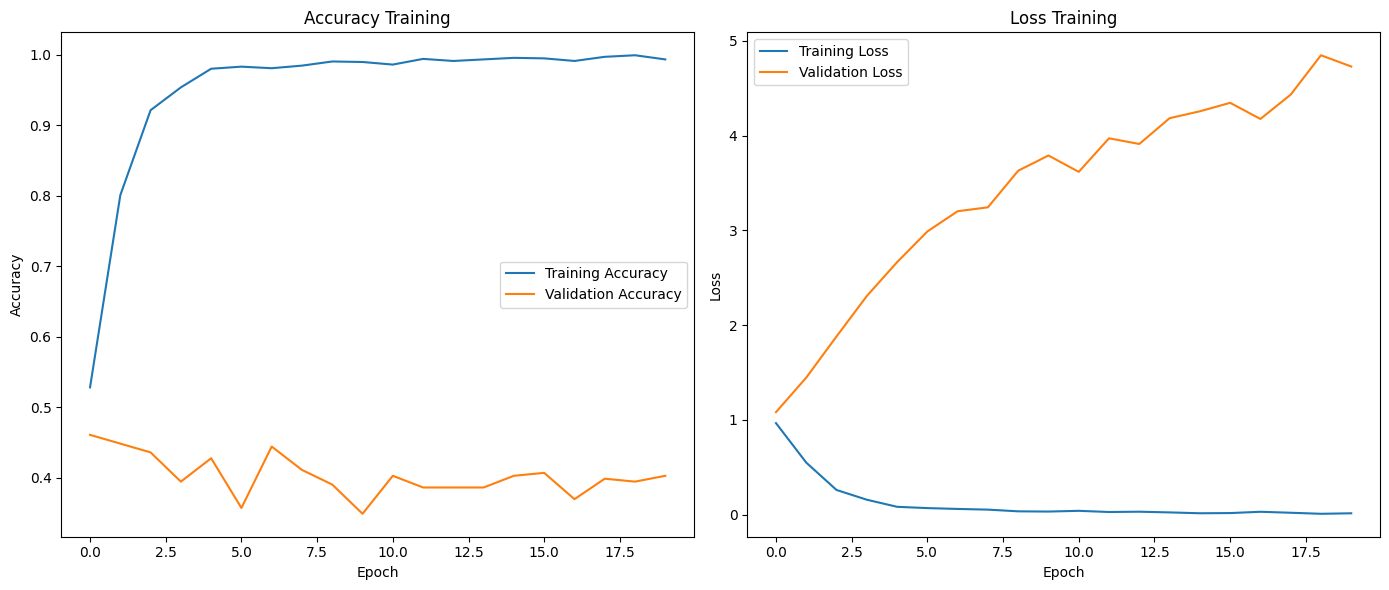

In [50]:
# Definir y entrenar los modelos `model1D`

# Función para extraer características del modelo
def extract_model(model, X):
  intermediate_model = Model(inputs=model.input, outputs=model.layers[-2].output)
  features = intermediate_model.predict(X)
  return features

# Extraer características de los conjuntos de datos
train_1d = model1D.predict(x_train)
val_1d = model1D.predict(x_val)
test_1d = model1D.predict(x_test)

train_2d = extract_model(model, train_x_imgs)
val_2d = extract_model(model, val_x_imgs)
test_2d = extract_model(model, test_x_imgs)

# Concatenar características
train_concat = np.concatenate([train_1d, train_2d], axis=1)
val_concat = np.concatenate([val_1d, val_2d], axis=1)
test_concat  = np.concatenate([test_1d, test_2d], axis=1)

# Definir la arquitectura del modelo de fusión
def create_fusion_model(input_shape, n_classes):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))
  return model

# Crear y compilar el modelo de fusión
shape_fusion = (train_concat.shape[1],)  # Convertir a tupla
fusion_model = create_fusion_model(shape_fusion, n_classes)
fusion_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Entrenar el modelo de fusión
fusion_history = fusion_model.fit(train_concat, y_train,
                                   epochs=20,
                                   batch_size=32,
                                   validation_data=(val_concat, y_val))

# Evaluar el modelo de fusión en el conjunto de prueba
scores = fusion_model.evaluate(test_concat, y_test)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

# Hacer predicciones en el conjunto de prueba
predictions = fusion_model.predict(test_concat)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Imprimir reporte de clasificación y matriz de confusión
print(classification_report(true_classes, predicted_classes))
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

# Crear una figura para las gráficas
plt.figure(figsize=(14, 6))

# Subtrama 1: Exactitud
plt.subplot(1, 2, 1)  # Primer gráfico en una figura de 1 fila y 2 columnas
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Training')

# Subtrama 2: Pérdida
plt.subplot(1, 2, 2)  # Segundo gráfico en una figura de 1 fila y 2 columnas
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Training')

# Mostrar las gráficas
plt.tight_layout()
plt.show()


# Early Fusion

Al ejecutar todas las celdas ya no me dejó terminar me salió el mensaje siguiente, hice otra cuenta de correo pero salió el mismo mensaje

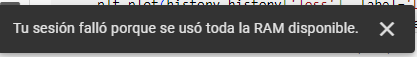

In [ ]:
#Define modelo 1D
def create_1D_MLP(input_shape, n_classes=3, dropout_rate=0.5):
    model = Sequential(name="1D_MLP")
    model.add(Dense(124, input_shape=(input_shape,), activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation="softmax", name='1D_output'))
    return model

#Define modelo 2d
def create_2D_CNN(input_shape, n_classes=3, dropout_rate=0.5):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    last = base_model.output
    x = GlobalMaxPooling2D()(last)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(n_classes, activation='softmax', name='2D_output')(x)

    model = Model(inputs=base_model.input, outputs=x, name="2D_CNN")
    return model

# datos de los modelos
input_shape_1d = x_train.shape[-1]
input_shape_2d = (224, 224, 3)
n_classes = 3
dropout_rate = 0.5

model_1D = create_1D_MLP(input_shape=input_shape_1d, n_classes=n_classes, dropout_rate=dropout_rate)
model_2D = create_2D_CNN(input_shape=input_shape_2d, n_classes=n_classes, dropout_rate=dropout_rate)

# crear entrada de modelos
input_1D = Input(shape=(input_shape_1d,), name='1D_Input')
input_2D = Input(shape=input_shape_2d, name='2D_Input')

# salidas de los modelos
output_1D = model_1D(input_1D)
output_2D = model_2D(input_2D)

# concatenar salidas
combined = Concatenate(name='Concatenate')([output_1D, output_2D])

# Agregar capas conectadas
x = Dense(128, activation='relu')(combined)
x = Dropout(dropout_rate)(x)  # Add Dropout
x = Dense(n_classes, activation='softmax')(x)

# modelo final
final_model = Model(inputs=[input_1D, input_2D], outputs=x, name='Fusion_Model')

#compilar modelo
final_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# resumen
final_model.summary()
plot_model(final_model, to_file='early_fusion_model_with_dropout.png', show_shapes=True, show_layer_names=True)

# entrenamiento
x_train_1d = np.random.rand(1360, input_shape_1d)
x_train_2d = np.random.rand(1360, *input_shape_2d)
y_train = tf.keras.utils.to_categorical(np.random.randint(0, n_classes, 1360), num_classes=n_classes)
# Entrenamiento del modelo
history = final_model.fit([x_train_1d, x_train_2d], y_train,
                          epochs=10, batch_size=32, validation_split=0.2)

#graficas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


Model: "Fusion_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 1D_Input (InputLayer)       [(None, 9)]                  0         []                            
                                                                                                  
 2D_Input (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 1D_MLP (Sequential)         (None, 3)                    5339      ['1D_Input[0][0]']            
                                                                                                  
 2D_CNN (Functional)         (None, 3)                    1524307   ['2D_Input[0][0]']            
                                                          5                            